In [1]:
import sys
sys.path.append('sources')
import traceback
import os
import json

# Choose the test
All the test available are in folder 'CPIs'

In [2]:
process_name = "loop" #"choice-task-init-reverse" #choice-task-init-reverse

## Load File 

In [3]:
cpi_file_path = f'CPIs/{process_name}.cpi'

print(f"Loading CPI file: {cpi_file_path}")

try:
	with open(cpi_file_path, 'r') as f:
		cpi_dict = json.load(f)

	print("✓ CPI file loaded successfully!")
	print(f"Root region type: {cpi_dict['type']}")
	print(f"Root region ID: {cpi_dict['id']}")

	# Pretty print the CPI structure
	print("\nCPI Structure:")
	print("=" * 50)
	print(json.dumps(cpi_dict, indent=2))

except FileNotFoundError:
	print(f"❌ File not found: {cpi_file_path}")
	print("Available files in CPIs directory:")
	try:
		for f in os.listdir('CPIs'):
			if f.endswith('.cpi'):
				print(f"  - {f}")
	except:
		print("  Could not list CPIs directory")
except Exception as e:
	print(f"❌ Error loading CPI file: {e}")
	traceback.print_exc()

Loading CPI file: CPIs/loop.cpi
✓ CPI file loaded successfully!
Root region type: sequence
Root region ID: 0

CPI Structure:
{
  "type": "sequence",
  "id": 0,
  "head": {
    "type": "task",
    "id": 1,
    "duration": 2,
    "impacts": {
      "cost": 20,
      "time": 5
    }
  },
  "tail": {
    "type": "parallel",
    "id": 2,
    "first_split": {
      "type": "loop",
      "id": 3,
      "probability": 0.3,
      "child": {
        "type": "sequence",
        "id": 4,
        "head": {
          "type": "task",
          "id": 5,
          "duration": 1,
          "impacts": {
            "cost": 5,
            "quality": 2
          }
        },
        "tail": {
          "type": "nature",
          "id": 6,
          "probability": 0.7,
          "true": {
            "type": "task",
            "id": 7,
            "duration": 3,
            "impacts": {
              "cost": 10,
              "quality": 5
            }
          },
          "false": {
            "type": 

# FROM CPI TO SPIN

In [4]:
from cpi_to_mdp.cpitospin import analyze_cpi_structure, CPIToSPINConverter

print("\nCPI Structure Analysis:")
print("=" * 50)
if 'cpi_dict' in locals():
	analyze_cpi_structure(cpi_dict)

print("Converting CPI to SPIN...")
print("=" * 50)

try:
	converter = CPIToSPINConverter()
	spin_model = converter.convert_cpi_to_spin(cpi_dict)

	print("✓ Conversion successful!")
	print("\nSPIN Model Summary:")
	print("-" * 30)
	spin_model.print_model_summary()

except Exception as e:
	print(f"❌ Conversion failed: {e}")
	traceback.print_exc()


CPI Structure Analysis:
sequence0
  head:
    task1
      duration: 2
      impacts: {'cost': 20, 'time': 5}
  tail:
    parallel2
      first_split:
        loop3
          repeat_probability: 0.3
          child:
            sequence4
              head:
                task5
                  duration: 1
                  impacts: {'cost': 5, 'quality': 2}
              tail:
                nature6
                  probability: 0.7
                  true:
                    task7
                      duration: 3
                      impacts: {'cost': 10, 'quality': 5}
                  false:
                    task8
                      duration: 1
                      impacts: {'cost': 3, 'quality': 1}
      second_split:
        choice9
          true:
            loop10
              repeat_probability: 0.8
              child:
                task11
                  duration: 2
                  impacts: {'cost': 12, 'time': 4}
          false:
            task12
    

## Process Visualization

The CPI dictionary can be visualized as a directed graph to better understand its structure. In this visualization:

- **Task nodes** show duration and impact values (cost, time, quality)
- **Nature nodes** display their probability values (e.g., "p=0.7")
- **Sequence nodes** connect components with "head" and "tail" edges
- **Parallel nodes** show concurrent branches with "first" and "second" edges
- **Choice nodes** represent decision points with "true" and "false" branches

Each node type is represented as a box, with edges showing the relationships between components. This hierarchical representation helps understand the process flow and decision points in the system.


Creating visualizations...
✓ CPI visualization created
✓ SPIN visualization created

CPI Structure Visualization:


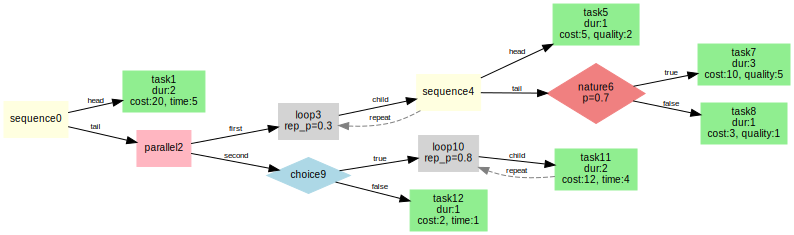


SPIN Model Visualization:


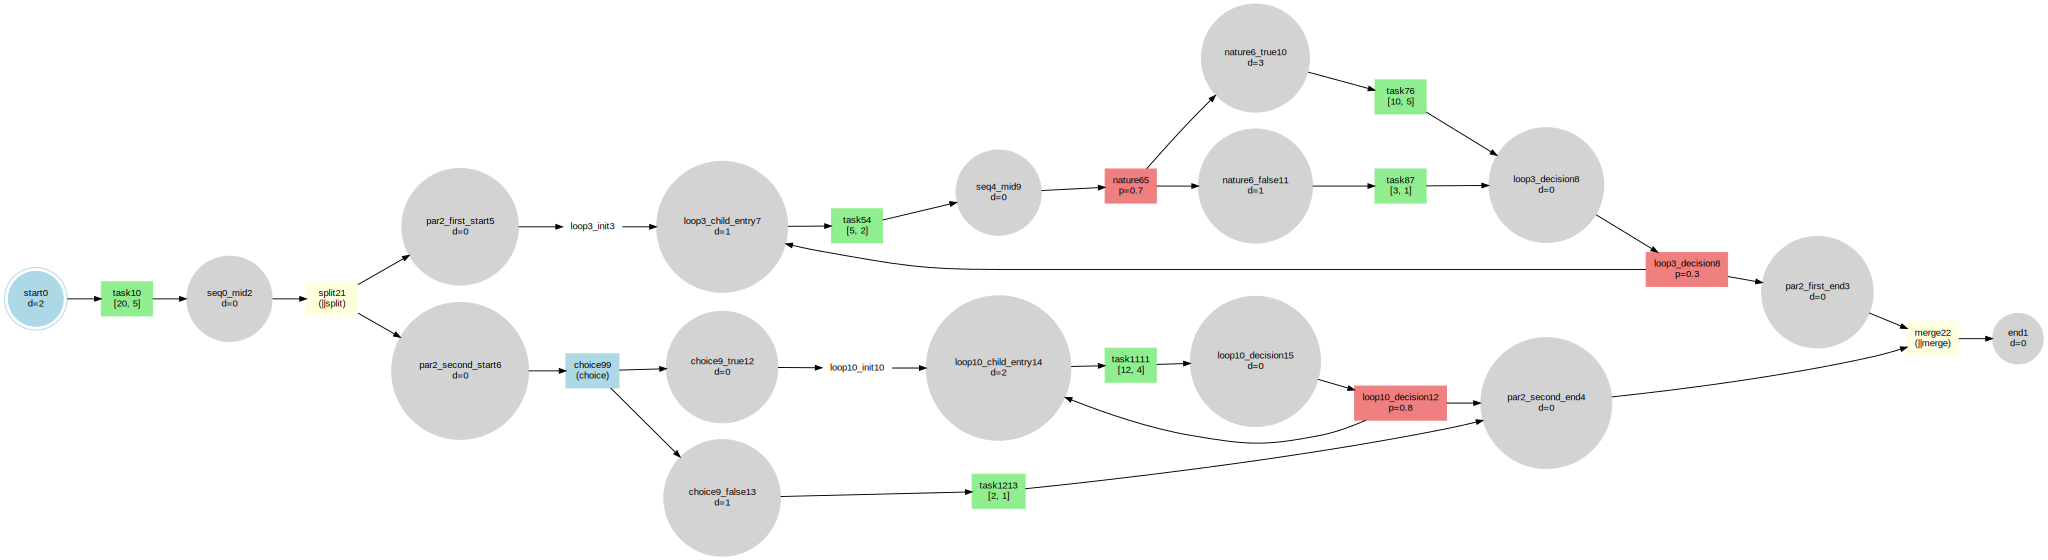

In [5]:
from cpi_to_mdp.cpitospin import create_cpi_visualization, create_spin_visualization

print("\nCreating visualizations...")
print("=" * 50)

try:
	# Create CPI visualization
	cpi_viz = create_cpi_visualization(cpi_dict, "CPI: Loop Example")
	print("✓ CPI visualization created")

	# Create SPIN visualization
	spin_viz = create_spin_visualization(spin_model, "SPIN: Loop Example")
	print("✓ SPIN visualization created")

	# Display visualizations (if in Jupyter)
	try:
		print("\nCPI Structure Visualization:")
		display(cpi_viz)

		print("\nSPIN Model Visualization:")
		display(spin_viz)
	except NameError:
		# Not in Jupyter, save to files instead
		print("Saving visualizations to files...")

		# Save CPI visualization
		cpi_output = process_name + '_cpi'
		cpi_viz.render(cpi_output, cleanup=True)
		print(f"CPI visualization saved to: {cpi_output}.png")

		# Save SPIN visualization
		spin_output = process_name + '_spin'
		spin_viz.render(spin_output, cleanup=True)
		print(f"SPIN visualization saved to: {spin_output}.png")

except Exception as e:
	print(f"❌ Visualization failed: {e}")
	traceback.print_exc()


# FROM SPIN TO PRISM

In [6]:
print("\nGenerating PRISM model...")
print("=" * 50)

try:
	prism_model = spin_model.generate_prism_model()

	print("✓ PRISM model generated successfully!")

	# Show model statistics
	lines = prism_model.split('\n')
	words = prism_model.split()

	print(f"Model statistics:")
	print(f"  Lines: {len(lines)}")
	print(f"  Words: {len(words)}")
	print(f"  Characters: {len(prism_model)}")

	# Show first 20 lines
	print(f"\nFirst 20 lines of PRISM model:")
	print("-" * 40)
	for i, line in enumerate(lines[:20]):
		print(f"{i + 1:2d}: {line}")

	if len(lines) > 20:
		print(f"... ({len(lines) - 20} more lines)")

except Exception as e:
	print(f"❌ PRISM generation failed: {e}")
	traceback.print_exc()

print("\nSaving PRISM model...")
print("=" * 50)

try:
	output_file =  "models/" + process_name + '.nm'
	with open(output_file, 'w') as f:
		f.write(prism_model)

	print(f"✓ PRISM model saved to: {output_file}")

	# Verify file was created
	if os.path.exists(output_file):
		file_size = os.path.getsize(output_file)
		print(f"File size: {file_size} bytes")
	else:
		print("❌ Warning: File was not created")

except Exception as e:
	print(f"❌ Save failed: {e}")
	traceback.print_exc()


Generating PRISM model...
✓ PRISM model generated successfully!
Model statistics:
  Lines: 590
  Words: 4157
  Characters: 50302

First 20 lines of PRISM model:
----------------------------------------
 1: // Global variables for places
 2: global STAGE : [0..5] init 0;
 3: 
 4: // Place value variables
 5: global choice9_false13_value : [-1..1] init -1;
 6: global choice9_true12_value : [-1..0] init -1;
 7: global end1_value : [-1..0] init -1;
 8: global loop10_child_entry14_value : [-1..2] init -1;
 9: global loop10_decision15_value : [-1..0] init -1;
10: global loop3_child_entry7_value : [-1..1] init -1;
11: global loop3_decision8_value : [-1..0] init -1;
12: global nature6_false11_value : [-1..1] init -1;
13: global nature6_true10_value : [-1..3] init -1;
14: global par2_first_end3_value : [-1..0] init -1;
15: global par2_first_start5_value : [-1..0] init -1;
16: global par2_second_end4_value : [-1..0] init -1;
17: global par2_second_start6_value : [-1..0] init -1;
18: global seq0

## RUN PRISM ANALYSIS

In [7]:
!prism

/bin/bash: line 1: prism: command not found


In [8]:
from env import PRISM_PATH
from prism import run_prism_analysis

prism_path = None # If PRISM_PATH is set in the environment
#prism_path = PRISM_PATH
run_prism_analysis(process_name, create_mdp=True)


Analysis complete. Results saved to models/loop.info


{'timestamp': '2025-06-14T11:34:07.876568',
 'modules': ['manager',
  'choice99',
  'loop10_decision12',
  'loop10_init10',
  'loop3_decision8',
  'loop3_init3',
  'merge22',
  'nature65',
  'split21',
  'task10',
  'task1111',
  'task1213',
  'task54',
  'task76',
  'task87'],
 'variables': ['STAGE',
  'choice9_false13_value',
  'choice9_true12_value',
  'end1_value',
  'loop10_child_entry14_value',
  'loop10_decision15_value',
  'loop3_child_entry7_value',
  'loop3_decision8_value',
  'nature6_false11_value',
  'nature6_true10_value',
  'par2_first_end3_value',
  'par2_first_start5_value',
  'par2_second_end4_value',
  'par2_second_start6_value',
  'seq0_mid2_value',
  'seq4_mid9_value',
  'start0_value',
  'choice9_false13_updated',
  'choice9_true12_updated',
  'end1_updated',
  'loop10_child_entry14_updated',
  'loop10_decision15_updated',
  'loop3_child_entry7_updated',
  'loop3_decision8_updated',
  'nature6_false11_updated',
  'nature6_true10_updated',
  'par2_first_end3_update

### Read output

In [9]:
from graphviz import Source

dot_filename = f"models/{process_name}.dot"

with open(dot_filename, 'r', encoding='utf-8') as f: #{process_name}/{process_name}.dot
    dot_content = f.read()
    Source(dot_content).render(filename=f"models/{process_name}", format='svg', cleanup=True)

states_filenames = f"models/{process_name}_states.csv"
transitions_filenames = f"models/{process_name}_trans.tra"

# FROM PRISM TO MDP

Since PRISM models are based on an extended form of MDPs, we now provide the compact version of the MDP generated by PRISM, which corresponds to the equivalent SPIN model. This enhances clarity and facilitates easier comparison between the two representations.

CASE 1: deterministic, 2 states directly connected

CASE 2: time passage 2 states connected with label="{{∅}}" fillcolor=lightsalmon

Case 3: choice: red transition with internal writing some choice I take (1+) and saying true/false --> written in the next state

case 4 natural: as choice but green transition and label on the probability arcs

Case 5: nature and contemporary choice: double transition first choice and then nature

In [10]:
from graphviz import Source
from collections import defaultdict
import pandas as pd
import re

def get_compact_states(states: pd.DataFrame, transitions: pd.DataFrame):
	states['STAGE'] = states['(STAGE'].apply(
		lambda x: x.split(':')[-1].split('(')[-1] if isinstance(x, str) else x
	)
	states.drop(columns=['(STAGE'], inplace=True)

	paren_cols = [col for col in states.columns if col.endswith(')')]

	for col in paren_cols:
		states[col.replace(')', '')] = states[col].apply(
			lambda x: x[-2] if isinstance(x, str) and len(x) >= 2 else x
		)
		states.drop(columns=[col], inplace=True)

	states = states.apply(pd.to_numeric)

	update_cols = [col for col in states.columns if col.endswith('_update')]
	state_cols = [col for col in states.columns if col.endswith('_state')]
	value_cols = [col for col in states.columns if col.endswith('_value')]

	stage_mask = states['STAGE'].isin([0])
	update_mask = (states[update_cols] == 0).all(axis=1)
	state_mask = (states[state_cols] == 0).all(axis=1)
	new_states_df = states[stage_mask & update_mask & state_mask]
	return new_states_df, set(new_states_df.index.astype(int).tolist()), value_cols

def create_trans_dict(transitions:pd.DataFrame, verbose = False):
	trans = transitions[0].str.split(expand=True)
	if verbose:
		print(trans.head())
		print(trans.shape)
	has_prob = trans.shape[1] >= 5

	# Extract relevant columns
	if has_prob:
		source_dest = trans[[0, 2, 3, 4]]
		source_dest.columns = ['source', 'destination', 'prob', 'label']
	else:
		source_dest = trans[[0, 2, 3]]
		source_dest.columns = ['source', 'destination', 'label']
	trans_dict = defaultdict(list)

	for _, row in source_dest.iterrows():
		source = int(row['source'])
		destination = int(row['destination'])
		prob = float(row['prob']) if has_prob else 1.0  # Default prob to 1.0 if missing
		label = [row['label'] ]if row['label'] else []
		trans_dict[source].append((destination, prob,label))

	return dict(trans_dict)

def find_next_state(src:int, trans_dict:dict, possible_targets: set, verbose = False):
	res = []
	for i in range(len(trans_dict[src])):
		if src == trans_dict[src][i][0]:
			return [] # it's final
		if trans_dict[src][i][0] in possible_targets:
			if verbose:
				print(trans_dict[src][i][0], trans_dict[src][i][1])
			res.append(trans_dict[src][i]) # questo significa che src e target sono collegati direttamente

	if len(res) > 0:
		return res
	for i in range(len(trans_dict[src])):
		# continua a cercare ma la destinazione è diventata source
		l = trans_dict[src][i][2]
		for r in find_next_state( trans_dict[src][i][0], trans_dict, possible_targets):
			l.extend(r[2])
			res.append((r[0], round(r[1] * trans_dict[src][i][1], 3), l))
	return res

def parse_rewards_file(filepath):
	rewards_dict = defaultdict(dict)
	current_impact = None

	with open(filepath, 'r') as file:
		for line in file:
			line = line.strip()

			if line.startswith('rewards'):
				match = re.search(r'rewards\s+"([^"]+)"', line)
				if match:
					current_impact = match.group(1)

			elif line == 'endrewards':
				current_impact = None

			elif current_impact:
				match = re.match(r'\[([^\]]+)\]\s+true\s*:\s*([0-9.eE+-]+);', line)

				if match:
					task_name = match.group(1)
					value = float(match.group(2))
					rewards_dict[task_name][current_impact] = value

	return dict(rewards_dict)

def is_passing_time(place_name, place_name_next):
    for k, v in place_name_next.items():
        if k in place_name.keys():
            if place_name[k] < v:
                return True # if passing time 
    return False # if not passing time

nature6_true10
par2_second_end4
[]
nature6_false11
par2_second_end4
[]
loop3_child_entry7
['choice9_true12']
loop3_child_entry7
['choice9_false13']
par2_first_end3
par2_second_end4
[]
loop3_child_entry7
par2_second_end4
[]
par2_first_end3
par2_second_end4
[]
loop10_child_entry14
par2_first_end3
[]
nature6_true10
par2_second_end4
[]
loop10_child_entry14
nature6_true10
[]
par2_first_end3
par2_second_end4
[]
loop3_child_entry7
par2_second_end4
[]
loop10_child_entry14
par2_first_end3
[]
loop10_child_entry14
loop3_child_entry7
[]
loop10_child_entry14
nature6_true10
[]
loop10_child_entry14
nature6_false11
[]


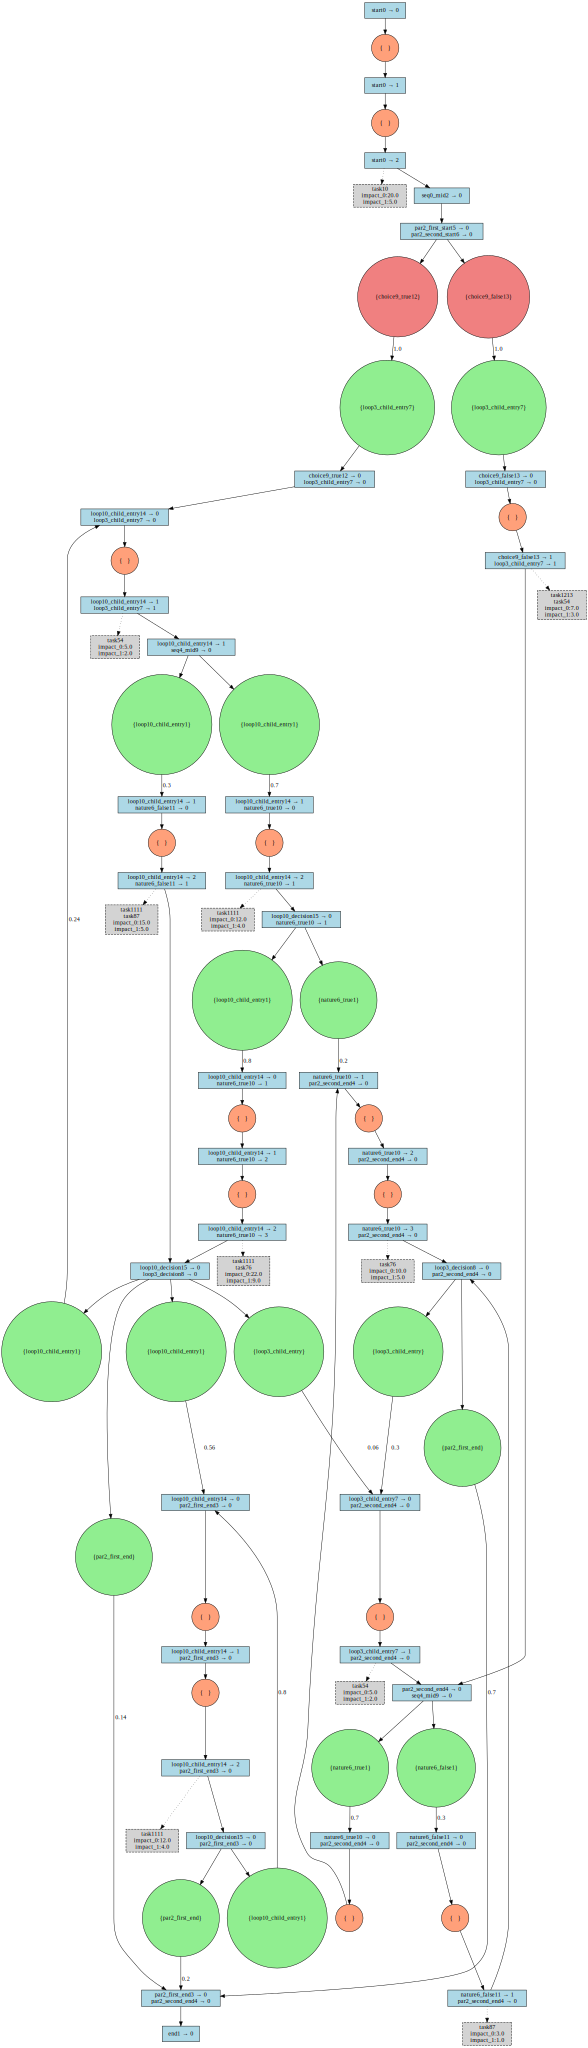

In [16]:
from graphviz import Source
from collections import defaultdict
import pandas as pd
import re

def prepare_label_states_dot(name:int, parts:{}):
    joined_parts = ''
    for k, v in parts.items():
        joined_parts += f'{k} → {v} \n'
    return f'{name} [label="{joined_parts}", style="filled", fillcolor="lightblue"];'
def format_label(row, value_cols):
    parts = {}
    '''
    {
        col.replace('_value', ''): [
                             int(row[col]), # valore temporale
                             1 if choice and true in col elif 0 if choice and false  else  None #mi segno se choice e in quale ramo
                             1 if nature and true in col else 0 #mi segno se nature e in quale ramo
                                    ]
        
    }
    '''
    for col in value_cols:
        if row[col] >= 0:
            parts[col.replace('_value', '')] = int(row[col])
    return prepare_label_states_dot(row.name, parts), parts


def format_label_impacts_impactslabel(label: list, rewards_dict: dict):
    l = []
    impact_sums = {}  # Accumulate sums for each impact
    
    for col in label:
        l.append(f"{col.replace('fire_', '')}")
        for impact, value in rewards_dict[col].items():
            if impact in impact_sums:
                impact_sums[impact] += value
            else:
                impact_sums[impact] = value

    # Format summed impacts as "impact_name:total_value"
    lab_impacts = [f'{impact}:{value}' for impact, value in impact_sums.items()]
    return '\n'.join(l), '\n'.join(lab_impacts)
    
def create_states_mdp(states:pd.DataFrame, transitions:pd.DataFrame, process_name, save =False):
    new_states_df, possible_targets, value_cols = get_compact_states(states, transitions)
    trans_dict = create_trans_dict(transitions)
    rewards_dict = parse_rewards_file(f"models/{process_name}.nm")
    lines = ['digraph LTS {', 'node [label="", shape="box"];']
    # print(new_states_df)
    idx_trans = max(possible_targets)+1 
    rows= dict(new_states_df.iterrows())
    for idx, row in rows.items():
        place_name_dot, place_name = format_label(row, value_cols)
        lines.append(place_name_dot) # add node states
        targets = find_next_state(idx, trans_dict, possible_targets)        
        if len(targets) == 1:
            # case 1 or case 2
            next_idx_target, _, label = targets[0]
            _, place_name_next = format_label(rows[next_idx_target], value_cols)
            if label: # add tasks and impacts 
                l , lab_impacts = format_label_impacts_impactslabel(label, rewards_dict)
                label_node_id = f'label_{idx_trans}'
                lines.append(f'{label_node_id} [label="{l} \\n {lab_impacts}", shape="box", style="filled,dashed", fillcolor="lightgrey"];')
                lines.append(f'{idx} -> {label_node_id} [style="dotted"];')
            if is_passing_time(place_name, place_name_next):
                # Case 2
                lines.append(f'{idx_trans} [label="{{∅}}" , style="filled", fillcolor="lightsalmon", shape="circle"];')      
                lines.append(f'{idx} -> {idx_trans};')
                lines.append(f'{idx_trans} -> {next_idx_target}; ')
            else:
                # Case 1              
                lines.append(f'{idx} -> {next_idx_target};')
        else: 
            i = 0
            i_nat = 0
            for t in targets:
                next_idx_target, probability, label = t
                prob_label = f'[label = ""]'     
                _, place_name_next = format_label(rows[next_idx_target], value_cols)
                # print(place_name_next , ' place next' )
                # print("choice" in place_name_next and "nature" not in place_name_next)
                # print("choice" in place_name_next , type(place_name_next))
                # print("nature" not in place_name_next)
                list_choices = [] 
                list_natures = []
                for k in place_name_next.keys():
                    if "choice" in k:
                        list_choices.append(k)
                    elif "nature" in k:
                        list_natures.append(k)
                    else:
                        print(k)
                        # caso loop
                        # print('no nat e no scelta in chiave ', k)
                print(list_choices)
                if len(list_choices) > 0 and len(list_natures) == 0:
                    print('only choice')
                    # Case 3: only choices
                    idx_c = f'{idx_trans}{i}'
                    # if "true" in
                    lines.append(f'{idx_c} [label="{{{place_name_next}}}" , style="filled", fillcolor="lightcoral", shape="circle" ];')
                    lines.append(f'{idx} -> {idx_c};')
                    lines.append(f'{idx_c} -> {next_idx_target} {prob_label}; ')
                    i +=1
                elif len(list_choices) == 0 and len(list_natures) > 0:
                    # Case 4: only natures
                    idx_n = f'{idx_trans}{i_nat}'
                    prob_label = f'[label = "{probability}"]'
                    lines.append(f'{idx_n} [label="{{{list(place_name_next.keys())[0][:-1]}}}" , style="filled", fillcolor="lightgreen", shape="circle" ];')
                    lines.append(f'{idx} -> {idx_n};')
                    lines.append(f'{idx_n} -> {next_idx_target} {prob_label}; ')
                    i_nat +=1
                else:
                    # Case 5: natures and choices
                    for ic, idx_c in enumerate(list_choices):
                        lines.append(f'{idx_c} [label="{{{idx_c}}}" , style="filled", fillcolor="lightcoral", shape="circle" ];')
                        if f'{idx} -> {idx_c};' not in lines:
                            lines.append(f'{idx} -> {idx_c};')
                        for in_, idx_n  in enumerate(list_natures):                            
                            lines.append(f'{idx_c}{idx_n} [label="{{{idx_n}}}" , style="filled", fillcolor="lightgreen", shape="circle" ];')                            
                            prob_label = f'[label = "{probability}"]' 
                            lines.append(f'{idx_c} -> {idx_c}{idx_n} {prob_label};')                                               
                            lines.append(f'{idx_c}{idx_n} -> {next_idx_target}; ')   
                    # idx -> idx_choice -> idx_nat -> idx_next
        idx_trans +=1
    lines.append('}')
    compress_dot = "\n".join(lines)
    if save:
        Source(compressed_dot).render(filename=f"models/{process_name}_cleaned", format='svg', cleanup=True)
    return compress_dot


states = pd.read_csv(states_filenames)
transitions = pd.read_csv(transitions_filenames, skiprows=1, header= None)

compressed_dot = create_states_mdp(states, transitions, process_name, True)

#print(compressed_dot)
Source(compressed_dot)

In [12]:
print(compressed_dot)

digraph LTS {
node [label="", shape="box"];
0 [label="start0 → 0 
", style="filled", fillcolor="lightblue"];
330 [label="{∅}" , style="filled", fillcolor="lightsalmon", shape="circle"];
0 -> 330;
330 -> 1; 
1 [label="start0 → 1 
", style="filled", fillcolor="lightblue"];
331 [label="{∅}" , style="filled", fillcolor="lightsalmon", shape="circle"];
1 -> 331;
331 -> 16; 
16 [label="start0 → 2 
", style="filled", fillcolor="lightblue"];
label_332 [label="task10 \n impact_0:20.0
impact_1:5.0", shape="box", style="filled,dashed", fillcolor="lightgrey"];
16 -> label_332 [style="dotted"];
16 -> 31;
31 [label="seq0_mid2 → 0 
", style="filled", fillcolor="lightblue"];
31 -> 47;
46 [label="par2_second_end4 → 0 
seq4_mid9 → 0 
", style="filled", fillcolor="lightblue"];
3340 [label="{nature6_true1}" , style="filled", fillcolor="lightgreen", shape="circle" ];
46 -> 3340;
3340 -> 77 [label = "0.7"]; 
3341 [label="{nature6_false1}" , style="filled", fillcolor="lightgreen", shape="circle" ];
46 -> 3341

In [13]:
states

,choice9_false13_value,choice9_true12_value,end1_value,loop10_child_entry14_value,loop10_decision15_value,loop3_child_entry7_value,loop3_decision8_value,nature6_false11_value,nature6_true10_value,par2_first_end3_value,...,merge22_state,nature65_state,split21_state,task10_state,task1111_state,task1213_state,task54_state,task76_state,STAGE,task87_state
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,0,0,0,0,0,0,0
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,0,1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,-1,0,-1,-1,-1,0,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,5,0
1160,0,-1,-1,-1,-1,0,-1,-1,-1,-1,...,0,-1,0,0,0,0,0,0,5,0
1161,0,-1,-1,-1,-1,0,-1,-1,-1,-1,...,0,-1,0,0,0,0,0,0,5,0
1162,0,-1,-1,-1,-1,0,-1,-1,-1,-1,...,0,-1,0,0,0,0,0,0,5,0


In [14]:
transitions

,0
0,0 0 586 1
1,1 0 602 1
2,2 0 8 1 fire_task10
3,3 0 841 1
4,4 0 3 1
...,...
1167,1159 0 313 1
1168,1160 0 1161 1
1169,1161 0 1162 1
1170,1162 0 1163 1
